In [1]:
%matplotlib inline

In [3]:
#############################################
# to find "invlib" in the main folder
import sys, os
sys.path.insert(0, os.path.abspath("../.."))
#############################################

# Plot settings

In [8]:
from invlib import set_style
fs = 5.5
set_style(fs, style="seaborn-dark")
n = 5

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, NullFormatter, FixedLocator
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from mpl_toolkits.axes_grid1 import ImageGrid

# Plot model covariance matrices

In [14]:
J = np.load("jacJoint.npz")
colsum = np.sum(J, axis=0)

# normalize to cumulative sensitivity (row sums of J)
MCMc = np.load("./MCMconst.npz")#/colsum
MCM = np.load("./MCM.npz")#/colsum

# normalize to max value
#MCMc /= np.max(np.abs(MCMc))
#MCM /= np.max(np.abs(MCM))

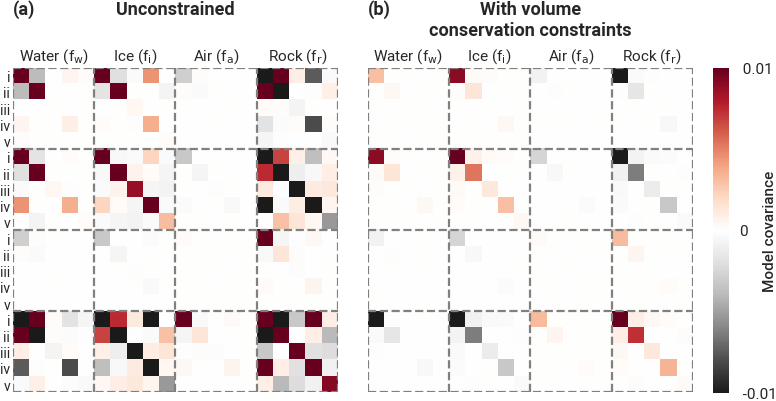

In [15]:
# Plot
fig = plt.figure(figsize=(4.62,3), dpi=200)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.15,
                 add_all=True, cbar_location="right", cbar_mode="edge",
                 cbar_size="5%", cbar_pad=0.1, aspect=True)

minv, maxv = -0.01, 0.01
for ax, mat in zip(grid.axes_all, [MCM, MCMc]):
    im = ax.imshow(mat, cmap="RdGy_r", vmin=minv, vmax=maxv)
    ax.set_aspect("equal")
    ticks = np.linspace(-0.5, 4*n -0.5, 5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    ax.set_xlim(-0.5, 4*n - 0.5)
    ax.set_ylim(-0.5, 4*n - 0.5)

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    minorLocator = FixedLocator(ticks[:-1] + n/2)
    subMinorLocator = FixedLocator(np.arange(4*n))
    majorFormatter = NullFormatter()
    ax.xaxis.set_minor_locator(minorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)

    ax.yaxis.set_minor_locator(subMinorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)

    labels = ["Water", "Ice", "Air","Rock"]
    long_labels = [r"%s (f$_{\rm %s}$)" % (lab, x) for lab, x in zip(labels, "wiar")]
    ylabs = ["i", "ii", "iii", "iv", "v"] * 4
    ax.set_xticklabels(long_labels,minor=True)
    ax.set_yticklabels(ylabs, minor=True, fontsize=5)
    
    ax.tick_params(axis='x', which='minor')#, top=False)
    ax.tick_params(axis='y', which='minor')#, left=False)

    ax.grid(which="major", color="0.5", linestyle='--')
    
for ax, title, letter in zip(grid.axes_all, [
        "Unconstrained\n", "With volume\nconservation constraints"
], "ab"):
    ax.set_title(title, fontsize=fs + 1, fontweight="bold")
    ax.set_title("(%s)\n" % letter, fontsize=fs + 1, fontweight="bold", loc="left")

ax.yaxis.tick_left()
cax = grid.cbar_axes[0]

cbar = fig.colorbar(im, orientation="vertical", cax=cax, pad=0)#, extend="both")
cbar.set_ticks([minv, 0, maxv])
cbar.set_ticklabels([" %.2f" % minv, "0", " %.2f" % maxv])
cbar.set_label(label="Model covariance", labelpad=-5, fontweight="semibold")
#fig.savefig("../../manuscripts/1_theory_and_implementation/Fig3_one_column.pdf")

1897.2052681794694


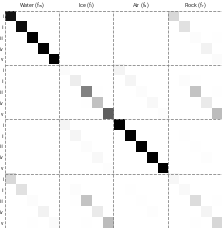

In [24]:
JTJ = J.T @ J
lam = 0.001 * np.median(np.diag(JTJ))#/10
print(lam)
R = np.linalg.inv(JTJ + lam * np.identity(len(JTJ))) @ JTJ
#R /= np.abs(R).max()

minv, maxv = 0, 1
fig, ax = plt.subplots()
im = ax.imshow(R, cmap="Greys", vmin=minv, vmax=maxv)
ax.set_aspect("equal")
ticks = np.linspace(-0.5, 4*n -0.5, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlim(-0.5, 4*n - 0.5)
ax.set_ylim(-0.5, 4*n - 0.5)

ax.invert_yaxis()
ax.xaxis.tick_top()

minorLocator = FixedLocator(ticks[:-1] + n/2)
subMinorLocator = FixedLocator(np.arange(4*n))
majorFormatter = NullFormatter()
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

ax.yaxis.set_minor_locator(subMinorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

labels = ["Water", "Ice", "Air","Rock"]
long_labels = [r"%s (f$_{\rm %s}$)" % (lab, x) for lab, x in zip(labels, "wiar")]
ylabs = ["i", "ii", "iii", "iv", "v"] * 4
ax.set_xticklabels(long_labels,minor=True)
ax.set_yticklabels(ylabs, minor=True, fontsize=5)

ax.tick_params(axis='x', which='minor')#, top=False)
ax.tick_params(axis='y', which='minor')#, left=False)

ax.grid(which="major", color="0.5", linestyle='--')

cbar = fig.colorbar(im, orientation="vertical", cax=cax, pad=0)#, extend="both")
cbar.set_ticks([minv, 0, maxv])
cbar.set_ticklabels([" %.2f" % minv, "0", " %.2f" % maxv])
cbar.set_label(label="Model covariance", labelpad=-5, fontweight="semibold")
fig.savefig("R.png")

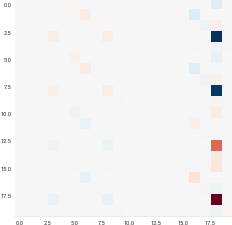

In [157]:
plt.imshow(MCM / colsum, cmap="RdBu_r")